# Amazon Beauty Products Review-Sentiment Analysis

## Import Necessary Libraries

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Datetime
from datetime import datetime

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Decompress the Amazon Review Dataset 

The dataset is obtained from http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Beauty_10.json.gz link and uploaded into Jupyter notebook via the following code. 

In [2]:
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('C:/Users/guzel/Documents/amazon_beauty_products/reviews_Beauty_10.json.gz')

## Inspecting the Dataset

In [3]:
# Shape of the dataset
df.shape

(28798, 9)

In [4]:
# Read the file
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]","I am a devotee to this serum, it does wonders ...",5.0,If I had to choose only one product to take ca...,1245283200,"06 18, 2009"
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]","As a woman nearing 50, I need all the help I c...",5.0,Makes my skin lovely and smooth,1358467200,"01 18, 2013"
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",I've used this regenerating serum for more tha...,5.0,Works well at a reasonable price,1322524800,"11 29, 2011"
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",I have tried so many products to just be total...,4.0,This does work ladies,1113350400,"04 13, 2005"
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",I love Oil of Olay. My primary moisturizer is ...,1.0,Did not like the feel/texture of this serum,1387584000,"12 21, 2013"


In [5]:
# Inspect the structure of the dataframe
df.sample(10).transpose()

,28487,15704,3123,21930,9709,8238,4198,22990,25210,24676
reviewerID,AWFGKB5SCJAO2,A1TR1R2QKWRSRA,A3JLOIXFM75QNV,A279A4Y2N1CQ26,A23KA66VAK9PUA,A1DO6DKWF3CMBD,A3D69HL1AHTYL,AEL6CQNQXONBX,A358745E4YJ2AY,A2BM0K1XK4O2OX
asin,B00KK62714,B00AE07BDU,B0027CT5TG,B00GJ7WV8M,B007E0FQ1W,B0063A432W,B0034KYDRE,B00GTBZHUW,B00HHR0SYW,B00GYF65TK
reviewerName,allowingplace,"D. Chou ""THE Savvy Consumer""","Valerya Couto ""LOTRsherlockHPFreak""",Crestviewer,"S. Sigley ""plant lady""",Big Daddy,BBCruz,Cute Chihuahua,"Andrea Nugent ""Reviews 411""","Courtney, With Love ""Visit my blog for more i..."
helpful,"[0, 1]","[0, 0]","[1, 2]","[0, 0]","[0, 0]","[0, 0]","[0, 0]","[0, 1]","[0, 0]","[2, 3]"
reviewText,I really like that this is fragrance free! It ...,"The spiky, messy hair style is all the rage so...","I am not a cream person, and figured if I didn...",This is a nice smoothing lotion. It has a plea...,I got to use this flat iron twice before my so...,Most of the spray-on sunscreens have such a te...,The colors are so rich and vibrant and they ac...,This shampoo / conditioner combo comes in a 12...,I have been using vitamin C serums for a while...,I like to use this in the morning before putti...
overall,5,4,3,4,4,5,5,4,5,5
summary,EXCELLENT,"Pretty good spiky, pointy hair styling glue.",A bit too strong aroma-wise for me,Great smoothing lotion,Good!,Spraying it is a pleasant experience,oh those colors...,Lathers good and has a nice peach scent. Both ...,I LOVE this Vitamin C Serum... It really works!,Fantastic!
unixReviewTime,1405900800,1362700800,1257638400,1398211200,1350691200,1340582400,1344384000,1393804800,1404345600,1401062400
reviewTime,"07 21, 2014","03 8, 2013","11 8, 2009","04 23, 2014","10 20, 2012","06 25, 2012","08 8, 2012","03 3, 2014","07 3, 2014","05 26, 2014"


In [6]:
# Inspect a sample 'reviewText'
df['reviewText'][2772]

'The Continuous Hydration in this night moisturizer certainly lives up to its name. Hours later, after a good night\'s sleep your skin will feel soft and smooth, if not a little bit slick. I found that the t-zone was a little greasy on me, so I have switched to using it only in specifically dry areas near the eyes and cheeks.It has a nice smooth feel to it and pleasant scent, but should be used for true dryness and might actually be too much for "average" skin. A little goes a long way, too.I would have preferred that it be packaged in a tube, since dipping in to the jar each evening is probably a bit more prone to leaving germs behind and causing it to degrade faster. Of course, that is a personal opinion, but I consider it something to think about.If you are looking for a super moisturizer and have very dry skin, this may be perfect for you. Those looking for a nice, light night cream might find it overwhelming.'

In [7]:
# Inspect a sample 'summary'
df['summary'][2772]

'Nighttime soother...'

In [8]:
# Basic information on Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28798 entries, 0 to 28797
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   reviewerID      28798 non-null  object 
 1   asin            28798 non-null  object 
 2   reviewerName    28576 non-null  object 
 3   helpful         28798 non-null  object 
 4   reviewText      28798 non-null  object 
 5   overall         28798 non-null  float64
 6   summary         28798 non-null  object 
 7   unixReviewTime  28798 non-null  int64  
 8   reviewTime      28798 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 3.4+ MB


**Each row corresponds to a customers' review information and related variables are explained below:**

reviewerID : ID of the reviewer

asin : ID of the product 

reviewerName : name of the reviewer 

helpful : helpfulness of the review, e.g. 2/3 

reviewText : text of the review 

overall : rating 

summary : summary of the review 

unixReviewTime : time of the review (unix time) 

reviewTime : time of the review (raw) 

In [9]:
# Basic Statistics of the Dataset
df.describe()

,overall,unixReviewTime
count,28798.000000,2.879800e+04
mean,4.168137,1.362445e+09
std,0.993920,4.214377e+07
min,1.000000,1.113350e+09
25%,4.000000,1.351123e+09
50%,4.000000,1.366070e+09
75%,5.000000,1.395274e+09
max,5.000000,1.406074e+09


In [10]:
# Checking weirdness on the dataset 
df['overall'][df['overall']<1].sum()

0.0

In [11]:
df['overall'][df['overall']>5].sum()

0.0

There is no rating out of defined 1-5 range. It makes sense. Let's see how many customers give ratings for each category. 

In [12]:
# Customer totals for each rating 
df['overall'].value_counts()

5.0    13766
4.0     8808
3.0     4110
2.0     1528
1.0      586
Name: overall, dtype: int64

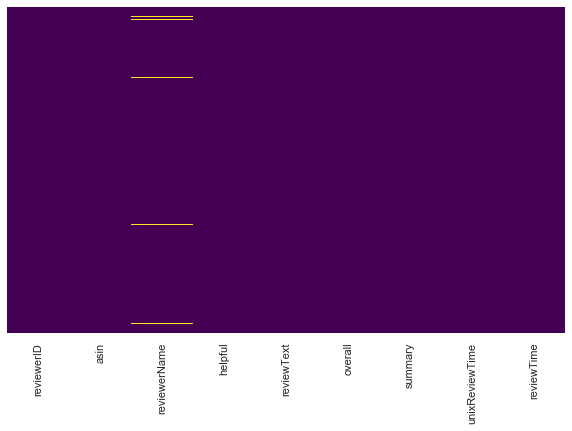

In [13]:
# Heatmap for missing values
plt.figure(figsize = (10,6))
sns.set()
_ = sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
# Check for missing values
df.isnull().sum()

reviewerID          0
asin                0
reviewerName      222
helpful             0
reviewText          0
overall             0
summary             0
unixReviewTime      0
reviewTime          0
dtype: int64

**Some information about dataset so far:**

This data includes 28798 rows(observations) and 9 columns(feature variables). 

Memory usage is 3.4+ MB. 

In the dataset, we have 7 object, 1 float64 and 1 int64 data types. 

222 'reviewerName' information is missing in the dataset. Since customer don't give their name, we should be suspicious about their reviews and ratings. I would prefer to drop the missing values from dataset  since we have enough observations to conclude a decision for sentiment analysis. 

We should concatenate 'reviewText' and 'summary' since both of them gives information about product, and also drop both 'reviewText' and 'summary' column at the end. 

'helpful' variable includes positive (thumbs up)  and negative (thumbs down) feedback for reviews' information, it will be splitted into two columns: positive feedback will be represented as "pos_feedback" , and negative feedback will be represented as "neg_feedback". Also, 'helpful' variable will be represented as an int64 type in the dataset via that step.

We should classify the 'overall' (ratings) as good, neutral and bad in order to make sentiment analysis. 

In the dataset, 'reviewerID' and 'reviwerName' are both for identification of customer. We should drop one of them from the dataset. Preferably, I will drop 'reviewerName' since customer names are not standardized and there are lots of different sytle to represent them.

'unixReviewTime' will be dropped since it has already been represented in 'reviewTime' feature in a more understandable format. Also, 'reviewTime' will be converted to datetime data type. 

We will rename the columns in order to improve practicality and the readibility of coding as stated below: 

- reviewerID : "customer"

- asin : "product"

- reviewerName : column will be dropped.

- helpful : positive feedback will be represented as "pos_feedback" , neutral feedback will be represented as "neut_feedback" and negative feedback will be represented as "neg_feedback".

- reviewText : This will be concatenated with "summary" and renamed as "review_text"

- overall : "rating" 

- summary : it will be dropped after it is concatenated with "reviewerText".

- unixReviewTime : column will be dropped. 

- reviewTime : "time"

Now, we will practice all defined action items above. 

## Dropping Missing Values

In [15]:
# Drop missing customers who don't give their names
df2 = df.dropna(axis=0)

In [16]:
# Customer totals for each rating (after drop missing values)
df2['overall'].value_counts()

5.0    13683
4.0     8742
3.0     4067
2.0     1508
1.0      576
Name: overall, dtype: int64

## Concatenating 'reviewText' and 'summary' columns

In [17]:
# Concatenate 'reviewText' and 'summary' as review_text and drop them 
df2['review_text'] = df[['summary', 'reviewText']].apply(lambda x: " ".join(str(y) for y in x if str(y) != 'nan'), axis = 1)
df2 = df2.drop(['reviewText', 'summary'], axis = 1)
df2.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review_text
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""","[5, 5]",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,"[2, 2]",5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...
2,A1V1EP514B5H7Y,B0000CC64W,asiana,"[0, 0]",5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""","[62, 75]",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,"[1, 1]",1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...


## Spliting 'helpful' column into two separate columns

In [18]:
# Split 'helpful' column into 'neg_feedback' and 'pos_feedback' and drop it at the end

list_positive = []
list_negative = []

for help in df2['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1] - help[0])
    
# Positive Feedback (Supporting reviewer's idea and find it useful)
df2['pos_feedback'] = list_positive

# Negative Feedback (Finding reviewer's idea useless and not supporting it)
df2['neg_feedback'] = list_negative

# Drop redundant 'helpful' column
df2 = df2.drop('helpful', axis = 1)
df2.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0


## Classify the 'overall' (ratings) as good, neutral and bad

In [19]:
# Classify ratings as good
good_rate = len(df2[df2['overall'] > 3])
neut_rate = len(df2[df2['overall'] == 3])
bad_rate = len(df2[df2['overall'] < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for beauty products'.format(good_rate))
print ('Neutral ratings : {} reviews for beauty products'.format(neut_rate))
print ('Bad ratings : {} reviews for beauty products'.format(bad_rate))

Good ratings : 22425 reviews for beauty products
Neutral ratings : 4067 reviews for beauty products
Bad ratings : 2084 reviews for beauty products


In [20]:
# Apply the new classification to the ratings column
df2['rating_class'] = df2['overall'].apply(lambda x: 'bad' if x < 3 else('good' if x > 3 else 'neutral'))
df2.head()

,reviewerID,asin,reviewerName,overall,unixReviewTime,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,"AmazonDiva ""Keep Calm and Carry On.""",5.0,1245283200,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,Anon. A. Non,5.0,1358467200,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,asiana,5.0,1322524800,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,"D ""D""",4.0,1113350400,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,Farnoosh Brock,1.0,1387584000,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


We have a new column named as 'rating_class' consists of three classes such as 'good, neutral and bad' after applying the new classification. 

## Dropping duplicate columns about customer ('reviwerName') and time ('unixReviewTime)

In [21]:
# Drop 'reviewName' and 'unixReviewTime'columns
df2 = df2.drop(['reviewerName', 'unixReviewTime'], axis = 1)
df2.head()

,reviewerID,asin,overall,reviewTime,review_text,pos_feedback,neg_feedback,rating_class
0,A6VPK7X53QNAQ,B0000CC64W,5.0,"06 18, 2009",If I had to choose only one product to take ca...,5,0,good
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,"01 18, 2013",Makes my skin lovely and smooth As a woman nea...,2,0,good
2,A1V1EP514B5H7Y,B0000CC64W,5.0,"11 29, 2011",Works well at a reasonable price I've used thi...,0,0,good
3,A1X2LENOF84LCQ,B0000CC64W,4.0,"04 13, 2005",This does work ladies I have tried so many pro...,62,13,good
4,A2PATWWZAXHQYA,B0000CC64W,1.0,"12 21, 2013",Did not like the feel/texture of this serum I ...,1,0,bad


## Arranging Time column

In [22]:
# Convert time object to datetime and create a new column named 'time'
df2['time'] = df2.reviewTime.str.replace(',', "")
df2['time'] = pd.to_datetime(df2['time'], format = '%m %d %Y')

# Drop redundant 'reviewTime' column
df2 = df2.drop('reviewTime', axis = 1)
df2.head()

,reviewerID,asin,overall,review_text,pos_feedback,neg_feedback,rating_class,time
0,A6VPK7X53QNAQ,B0000CC64W,5.0,If I had to choose only one product to take ca...,5,0,good,2009-06-18
1,A3CHMHGSJSQ02J,B0000CC64W,5.0,Makes my skin lovely and smooth As a woman nea...,2,0,good,2013-01-18
2,A1V1EP514B5H7Y,B0000CC64W,5.0,Works well at a reasonable price I've used thi...,0,0,good,2011-11-29
3,A1X2LENOF84LCQ,B0000CC64W,4.0,This does work ladies I have tried so many pro...,62,13,good,2005-04-13
4,A2PATWWZAXHQYA,B0000CC64W,1.0,Did not like the feel/texture of this serum I ...,1,0,bad,2013-12-21


In [23]:
# Check the 'time' data type with a sample observation
type(df2.time[110])

pandas._libs.tslibs.timestamps.Timestamp

## Rename column names

In [24]:
# Rename the columns
df2.columns = ['customer', 'product', 'rating', 'review_text', 'pos_feedback', 'neg_feedback', 'rating_class', 'time']

# Sample observation
df2.sample()

,customer,product,rating,review_text,pos_feedback,neg_feedback,rating_class,time
6932,ALYZJ7W14YS26,B005TI7L7I,5.0,Nice light moisturizer Simple Hydrating Light ...,0,0,good,2013-03-11


In [25]:
## Write created dataframe to CSV file

In [26]:
df2.to_csv('data_inspected.csv', sep = ',', encoding = 'utf-8', index = False)